In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [2]:
data = pd.read_csv("miners.csv")

In [3]:
data.head(10)

,Product ID,Product Category,Product Name,Product price,Sizes,Colors,State,AGE,Date
0,1005,Hoodie,short sleve hoodie,23,L,WHITE,NJ,38,1/1/2017
1,1001,Hoodie,graphic hoodie,32,M,RED,NY,54,1/1/2017
2,1002,Hoodie,half zip hoodie,23,XXL,BLACK,NY,54,1/1/2017
3,8004,Tshirts,cropped tshirt,23,S,WHITE,AZ,19,1/1/2017
4,4005,shirts,denim shirt,14,S,BLUE,MI,57,1/1/2017
5,3004,Shoes,work shoes,20,XL,GREEN,CA,45,1/1/2017
6,7003,socks,ribbed socks,12,L,RED,CT,50,1/1/2017
7,8002,Tshirts,v neck tshirt,15,XL,GREEN,MI,45,1/1/2017
8,3001,Shoes,formal shoes,23,M,GREEN,CT,25,1/1/2017
9,1001,Hoodie,graphic hoodie,32,XXL,BLUE,CT,28,1/1/2017


In [33]:
data.tail()

,Product ID,Product Category,Product Name,Product price,Sizes,Colors,State,AGE,Date
85993,1001,Hoodie,graphic hoodie,32,XL,GREEN,NY,60,2017-12-31
85994,2003,Trousers,Shadow Jeans,25,XXL,BLACK,NY,22,2017-12-31
85995,4002,shirts,button shirt,13,S,GREEN,MD,23,2017-12-31
85996,2005,Trousers,Chinos,24,M,WHITE,CT,40,2017-12-31
85997,8001,Tshirts,round neck tshirt,19,XXL,BLUE,MA,59,2017-12-31


In [34]:
data.describe()

,Product ID,Product price,AGE
count,85998.000000,85998.000000,85998.000000
mean,4582.634573,18.653899,39.100374
std,2945.360456,6.132276,12.399054
min,1001.000000,8.000000,18.000000
25%,2003.000000,14.000000,28.000000
50%,4002.000000,18.000000,39.000000
75%,8001.000000,23.000000,50.000000
max,9005.000000,32.000000,60.000000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85998 entries, 0 to 85997
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product ID        85998 non-null  int64         
 1   Product Category  85998 non-null  object        
 2   Product Name      85998 non-null  object        
 3   Product price     85998 non-null  int64         
 4   Sizes             85998 non-null  object        
 5   Colors            85998 non-null  object        
 6   State             85998 non-null  object        
 7   AGE               85998 non-null  int64         
 8   Date              85998 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 5.9+ MB


In [4]:
data['Date'] = data['Date'].apply(lambda x: datetime.datetime.strptime(x,'%m/%d/%Y'))

In [5]:
x=data['Date'].dt.strftime('%b')

In [7]:
x

0        Jan
1        Jan
2        Jan
3        Jan
4        Jan
        ... 
85993    Dec
85994    Dec
85995    Dec
85996    Dec
85997    Dec
Name: Date, Length: 85998, dtype: object

In [8]:
y=data['Product Category'].value_counts()
y

Hoodie      16834
Shoes       11860
Trousers    11816
socks       11686
shirts      11406
Tshirts     11198
shorts      11198
Name: Product Category, dtype: int64

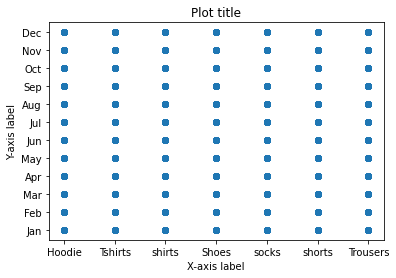

In [11]:
plt.scatter(data['Product Category'],x)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Plot title')
plt.show()

C:\Users\saivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


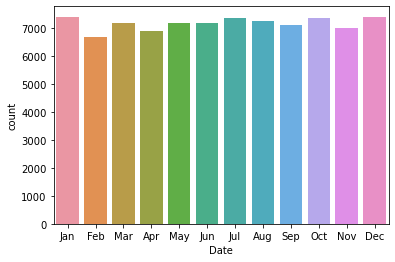

In [16]:
sns.countplot(x)

C:\Users\saivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product Category', ylabel='count'>

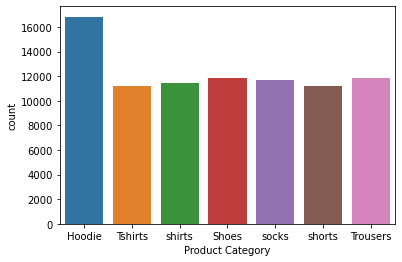

In [14]:
sns.countplot(data['Product Category'])

In [15]:
sns.countplot(data['Product Category'])

AttributeError: module 'matplotlib.pyplot' has no attribute 'countplot'

In [26]:
count=1-100

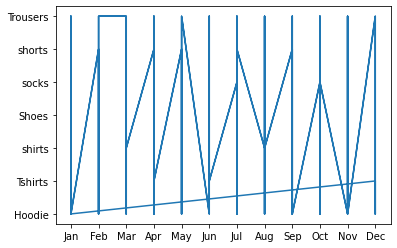

In [30]:
plt.plot(x,data['Product Category'])

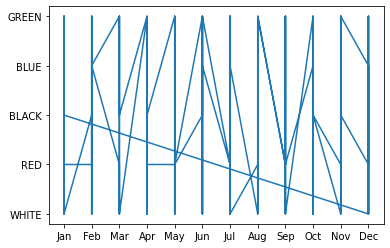

In [32]:
plt.plot(x,data['Colors'])

C:\Users\saivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product price', ylabel='State'>

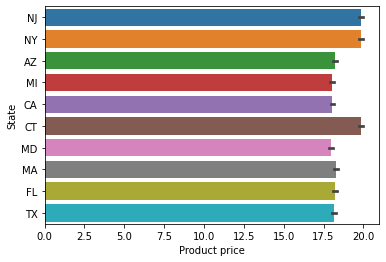

In [36]:
sns.barplot(data['Product price'], data['State'])

C:\Users\saivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

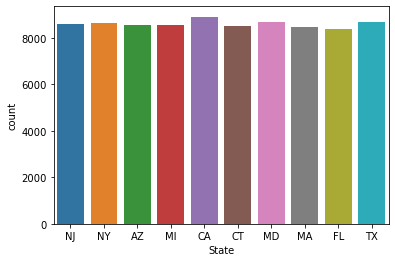

In [37]:
sns.countplot(data['State'])